Import Libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Memanggil atau membaca dataset

In [ ]:
data = pd.read_csv('CreditDataset.csv')

In [66]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Encode fitur kategorikal menggunakan LabelEncoder

In [ ]:
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

Bagi data menjadi feature (X) dan target (y)

In [ ]:
X = data_encoded.drop('Class', axis=1)
y = data_encoded['Class']

Bagi kumpulan data menjadi training set dan testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Periksa bentuk data yang dipisahkan

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

Ubah variabel target menjadi biner (1 untuk kelas yang diminati, 0 untuk yang lain)

In [68]:
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

Build and train the Decision Tree model

In [69]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_bin)

DecisionTreeClassifier(random_state=42)

Membuat prediksi

In [70]:
y_pred_dt = dt_model.predict(X_test)

Hitung metrik evaluasi

In [71]:
accuracy_dt = accuracy_score(y_test_bin, y_pred_dt)
precision_dt = precision_score(y_test_bin, y_pred_dt)
recall_dt = recall_score(y_test_bin, y_pred_dt)
f1_dt = f1_score(y_test_bin, y_pred_dt)

Hitung AUC-ROC

In [72]:
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test_bin, y_proba_dt)

Hitung kurva ROC

In [73]:
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_proba_dt)


ROC curve

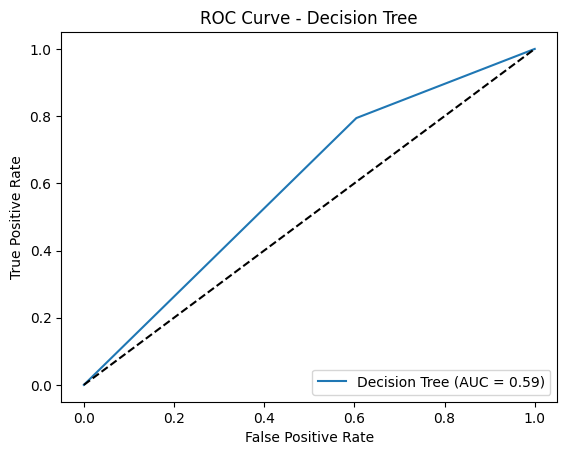

In [74]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Menampilkan hasil evaluasi

In [75]:
print(f'Akurasi: {accuracy_dt}')
print(f'Presisi: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1-Score: {f1_dt}')
print(f'AUC: {auc_dt}')

Akurasi: 0.6733333333333333
Presisi: 0.751131221719457
Recall: 0.7942583732057417
F1-Score: 0.772093023255814
AUC: 0.5949313844050687
